# Project: Credit Assessment Model for Banking and Financial Sector

In [88]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [89]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Credit%20Default.csv")
df

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1
...,...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0.032535,0
1996,69516.12757,23.162104,3503.176156,0.050394,0
1997,44311.44926,28.017167,5522.786693,0.124636,1
1998,43756.05660,63.971796,1622.722598,0.037086,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [91]:
df.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


In [92]:
# Check multicollinearity columns (if corr > 0.9, severely multicollinear)
corr_matrix = df.corr()
corr_matrix

,Income,Age,Loan,Loan to Income,Default
Income,1.000000,-0.034984,0.441117,-0.019862,0.002284
Age,-0.034984,1.000000,0.006561,0.021588,-0.444765
Loan,0.441117,0.006561,1.000000,0.847495,0.377160
Loan to Income,-0.019862,0.021588,0.847495,1.000000,0.433261
Default,0.002284,-0.444765,0.377160,0.433261,1.000000


<AxesSubplot:>

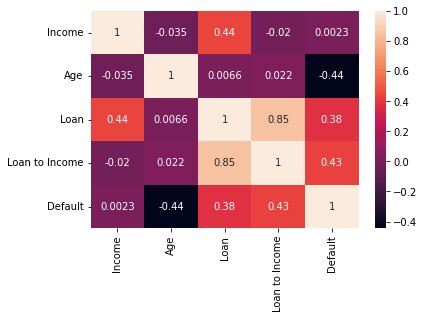

In [93]:
# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True)

In [94]:
# Define the target and features
target = "Default"
y = df[target]
X = df.drop(columns=target)

In [95]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
# Set model baseline
y_train_mode = y_train.mode()
y_pred_baseline = [y_train_mode] * len(y_train)

# Calculate baseline metrics
accuracy_baseline = accuracy_score(y_train, y_pred_baseline)
accuracy_baseline

0.8635714285714285

In [97]:
confusion_matrix_baseline = confusion_matrix(y_train, y_pred_baseline)
confusion_matrix_baseline

array([[1209,    0],
       [ 191,    0]], dtype=int64)

In [98]:
classification_report_baseline = classification_report(y_train, y_pred_baseline, zero_division=0)
print(classification_report_baseline)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1209
           1       0.00      0.00      0.00       191

    accuracy                           0.86      1400
   macro avg       0.43      0.50      0.46      1400
weighted avg       0.75      0.86      0.80      1400



In [99]:
# Train the model
model = make_pipeline(MinMaxScaler(), LogisticRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [100]:
# Make predictions
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9466666666666667

In [101]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[497,  11],
       [ 21,  71]], dtype=int64)

In [102]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       508
           1       0.87      0.77      0.82        92

    accuracy                           0.95       600
   macro avg       0.91      0.88      0.89       600
weighted avg       0.95      0.95      0.95       600

